In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(mltools)
library(MLmetrics)
library(nnet)
library(class)
library(MASS)
library(caret)
library(ISLR2)
library(boot)
library(caret)
library(nnet)
library(rsample)
library(tidymodels)
library(recipes)
library(DataExplorer)
library(discrim)
library(dplyr)
library("corrplot")
library(class)
library(ellipse)
library(RColorBrewer)
library(ggplot2)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na



Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:MLmetrics’:

    MAE, RMSE


The following object is masked from 

In [7]:
test<-read.csv("/kaggle/input/forest-frenzy/test.csv")
train<-read.csv("/kaggle/input/forest-frenzy/train.csv")
sample<-("/kaggle/input/forest-frenzy/sample_submission.csv")

In [ ]:
head(train)

In [8]:
# Converting binary columns
train <- train %>% 
mutate(across(wilderness_area1:cover_type, factor)) %>%
mutate(wilderness_area = case_when(
    wilderness_area1 == 1 ~ 1,
    wilderness_area2 == 1 ~ 2,
    wilderness_area3 == 1 ~ 3,
    wilderness_area4 == 1 ~ 4
  )) %>% 
mutate(soil_type = case_when(
    soil_type1 == 1 ~ 1,
    soil_type2 == 1 ~ 2,
    soil_type3 == 1 ~ 3,
    soil_type4 == 1 ~ 4,
    soil_type5 == 1 ~ 5,
    soil_type6 == 1 ~ 6,
    soil_type7 == 1 ~ 7,
    soil_type8 == 1 ~ 8,
    soil_type9 == 1 ~ 9,
    soil_type10 == 1 ~ 10,
    soil_type11 == 1 ~ 11,
    soil_type12 == 1 ~ 12,
    soil_type13 == 1 ~ 13,
    soil_type14 == 1 ~ 14,
    soil_type15 == 1 ~ 15,
    soil_type16 == 1 ~ 16,
    soil_type17 == 1 ~ 17,
    soil_type18 == 1 ~ 18,
    soil_type19 == 1 ~ 19,
    soil_type20 == 1 ~ 20,
    soil_type21 == 1 ~ 21,
    soil_type22 == 1 ~ 22,
    soil_type23 == 1 ~ 23,
    soil_type24 == 1 ~ 24,
    soil_type25 == 1 ~ 25,
    soil_type26 == 1 ~ 26,
    soil_type27 == 1 ~ 27,
    soil_type28 == 1 ~ 28,
    soil_type29 == 1 ~ 29,
    soil_type30 == 1 ~ 30,
    soil_type31 == 1 ~ 31,
    soil_type32 == 1 ~ 32,
    soil_type33 == 1 ~ 33,
    soil_type34 == 1 ~ 34,
    soil_type35 == 1 ~ 35,
    soil_type36 == 1 ~ 36,
    soil_type37 == 1 ~ 37,
    soil_type38 == 1 ~ 38,
    soil_type39 == 1 ~ 39,
    soil_type40 == 1 ~ 40
  )) 

# Converting soil and wildnerness to factor
train$soil_type <- as.factor(train$soil_type)
train$wilderness_area <- as.factor(train$wilderness_area)

# Combining distance to hydrology into total distance
train <- train %>%
  mutate(
    distance_to_hydro = horizontal_distance_to_hydrology + vertical_distance_to_hydrology,
  ) 

In [ ]:
# same for test

# Converting binary columns
test <- test %>% 
mutate(across(wilderness_area1:soil_type40, factor)) %>%
mutate(wilderness_area = case_when(
    wilderness_area1 == 1 ~ 1,
    wilderness_area2 == 1 ~ 2,
    wilderness_area3 == 1 ~ 3,
    wilderness_area4 == 1 ~ 4
  )) %>% 
mutate(soil_type = case_when(
    soil_type1 == 1 ~ 1,
    soil_type2 == 1 ~ 2,
    soil_type3 == 1 ~ 3,
    soil_type4 == 1 ~ 4,
    soil_type5 == 1 ~ 5,
    soil_type6 == 1 ~ 6,
    soil_type7 == 1 ~ 7,
    soil_type8 == 1 ~ 8,
    soil_type9 == 1 ~ 9,
    soil_type10 == 1 ~ 10,
    soil_type11 == 1 ~ 11,
    soil_type12 == 1 ~ 12,
    soil_type13 == 1 ~ 13,
    soil_type14 == 1 ~ 14,
    soil_type15 == 1 ~ 15,
    soil_type16 == 1 ~ 16,
    soil_type17 == 1 ~ 17,
    soil_type18 == 1 ~ 18,
    soil_type19 == 1 ~ 19,
    soil_type20 == 1 ~ 20,
    soil_type21 == 1 ~ 21,
    soil_type22 == 1 ~ 22,
    soil_type23 == 1 ~ 23,
    soil_type24 == 1 ~ 24,
    soil_type25 == 1 ~ 25,
    soil_type26 == 1 ~ 26,
    soil_type27 == 1 ~ 27,
    soil_type28 == 1 ~ 28,
    soil_type29 == 1 ~ 29,
    soil_type30 == 1 ~ 30,
    soil_type31 == 1 ~ 31,
    soil_type32 == 1 ~ 32,
    soil_type33 == 1 ~ 33,
    soil_type34 == 1 ~ 34,
    soil_type35 == 1 ~ 35,
    soil_type36 == 1 ~ 36,
    soil_type37 == 1 ~ 37,
    soil_type38 == 1 ~ 38,
    soil_type39 == 1 ~ 39,
    soil_type40 == 1 ~ 40
  )) 

# Converting soil and wildnerness to factor
test$soil_type <- as.factor(test$soil_type)
test$wilderness_area <- as.factor(test$wilderness_area)

# Combining distance to hydrology into total distance
test <- test %>%
  mutate(
    distance_to_hydro = horizontal_distance_to_hydrology + vertical_distance_to_hydrology,
  ) 

I had seen other classmates use this approach for the numerous soil type columns. On my end, the soil type columns made this way were unable to be included in some of the models. It might have been easir to group soil type by 10's, keeping them as binary, which is something Ill revisit about this assignment. 

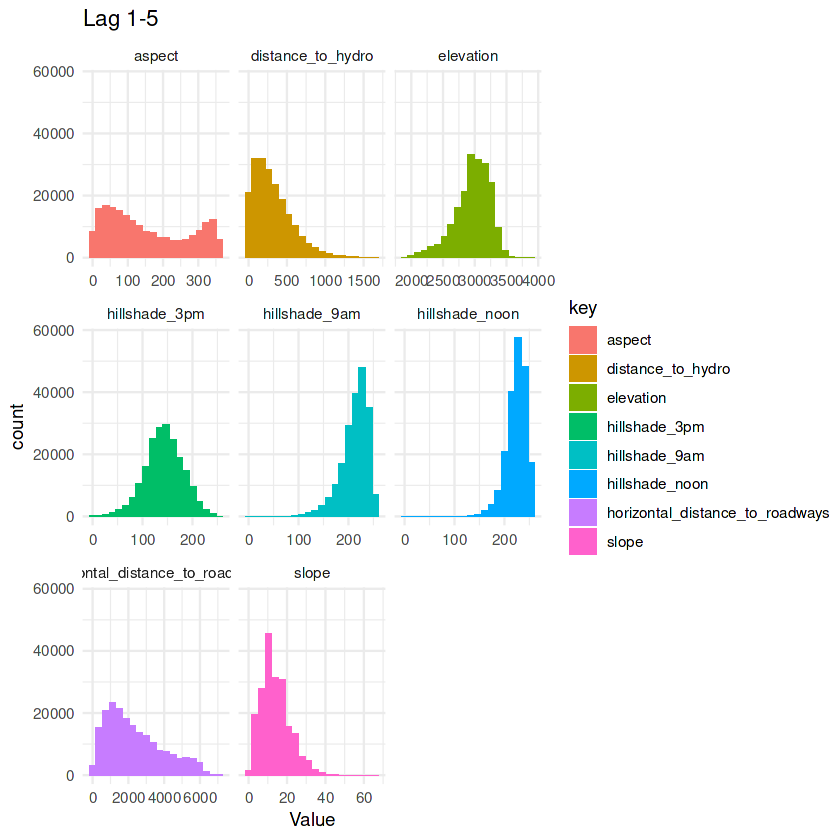

In [9]:
# Selecting columns for analysis
train1<-train[,-c(5, 6, 12:55)]

#re-ordering columns
train1<-train1[, c("id", "elevation", "aspect", "slope", "distance_to_hydro", "horizontal_distance_to_roadways", "hillshade_9am", "hillshade_noon", "hillshade_3pm", "horizontal_distance_to_fire_points", "wilderness_area", "soil_type", "cover_type")]

train_sub<-train1[, 2:9]

# Visualizing distributions of predictors to determin if gaussian
library(ggplot2)
data_long<-gather(train_sub)
ggplot(data_long, aes(x = value, fill = key)) +
  geom_histogram(position = "dodge", bins = 20) +
  facet_wrap(~ key, scales = "free_x") +
  labs(title = "Lag 1-5", x = "Value") +
  theme_minimal()

In [ ]:
head(test)

In [ ]:
# Selecting columns for analysis
test1<-test[,-c(5, 6, 12:55)]

#re-ordering columns
test1<-test1[, c("id", "elevation", "aspect", "slope", "distance_to_hydro", "horizontal_distance_to_roadways", "hillshade_9am", "hillshade_noon", "hillshade_3pm", "horizontal_distance_to_fire_points", "wilderness_area", "soil_type")]

Since some of the models assume a normal distribution, it can be seen that they might be impacted by the distributions of the predictors. Hillshade_3pm appears to have a close to gaussian distribution, but alone it might not prove as a sufficient predictor for cover_type. 

In [ ]:
summary(train1)

In [ ]:
# box plotting predictors with outcome to determine class seperation
ggplot(data=train1, aes(x= elevation, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= aspect, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= slope, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= distance_to_hydro, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= horizontal_distance_to_roadways, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= hillshade_9am, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= hillshade_noon, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= hillshade_3pm, y= cover_type))+geom_boxplot()
ggplot(data=train1, aes(x= horizontal_distance_to_fire_points, y= cover_type))+geom_boxplot()

Based on this, it really only seems that elevation has reasonable seperation between classes in cover type. Other variables do have some spread, but there is also significant overlap with other classes.  

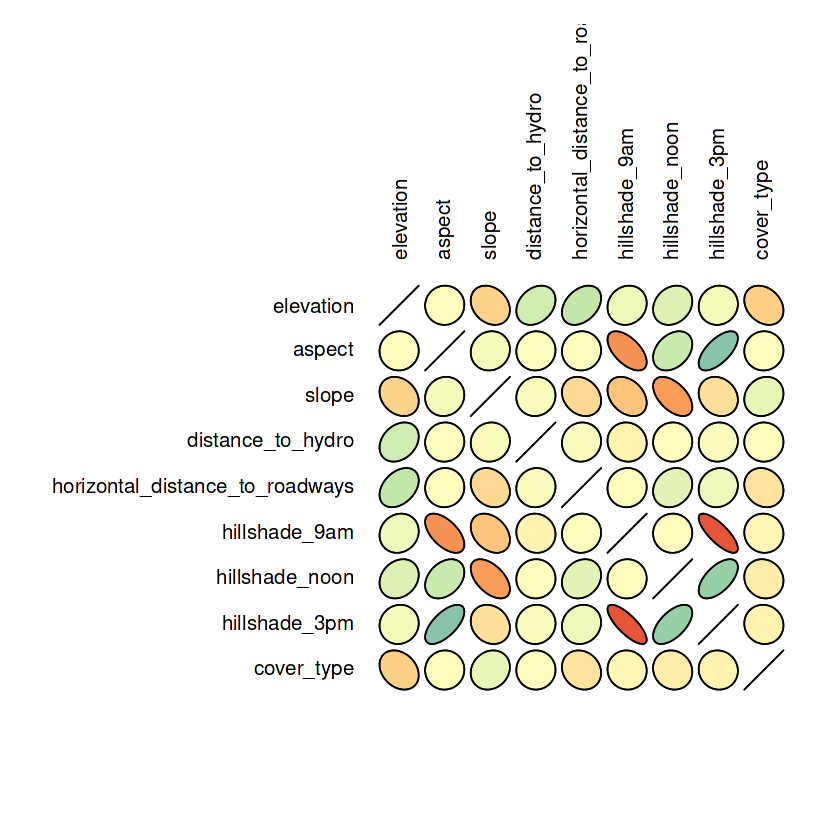

In [10]:
# Correlation Analysis (having some fun with r - gallery)
trainsub2<-train1[,c(2:9, 13)]
trainsub2$cover_type<- as.numeric(trainsub2$cover_type)
data<-cor(trainsub2)
 
 
# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors <- colorRampPalette(my_colors)(100)
 

plotcorr(data, col=my_colors[data*50+50] , mar=c(1,1,1,1)  )

It looks like there is some correlation between variables, including hillshade, aspect. slope. Distance to hydrology had shown correlation (horizontal/ vertical), but that disappeared when the variables were combined. It's not suprising to assume that aspect, slope, and hillshade are correlated, given that they pertain to aspects of location and sunlight. 

In [13]:
head(train1)

,id,elevation,aspect,slope,distance_to_hydro,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_area,soil_type,cover_type
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,A1,2840,20,6,48,566,216,228,149,566,3,23,2
2,A2,2690,95,11,0,1605,238,223,114,2346,3,17,2
3,A3,2759,22,17,0,752,207,200,126,2082,1,20,1
4,A4,3140,51,27,619,1981,222,172,68,2754,3,33,1
5,A5,3170,29,6,31,1288,218,226,144,1205,1,29,2
6,A6,2780,148,16,57,3416,240,237,121,3101,1,30,1


In [19]:
train1$cover_type <- as.character(train1$cover_type)

# Compute count of each level
counts <- table(train1$cover_type)

# Create a data frame with count and class columns
donut_train <- data.frame(
  class = names(counts),
  count = as.numeric(counts)
)

View(donut_train)

class,count
<chr>,<dbl>
1,72879
2,97433
3,12388
4,936
5,3227
6,6078
7,7059


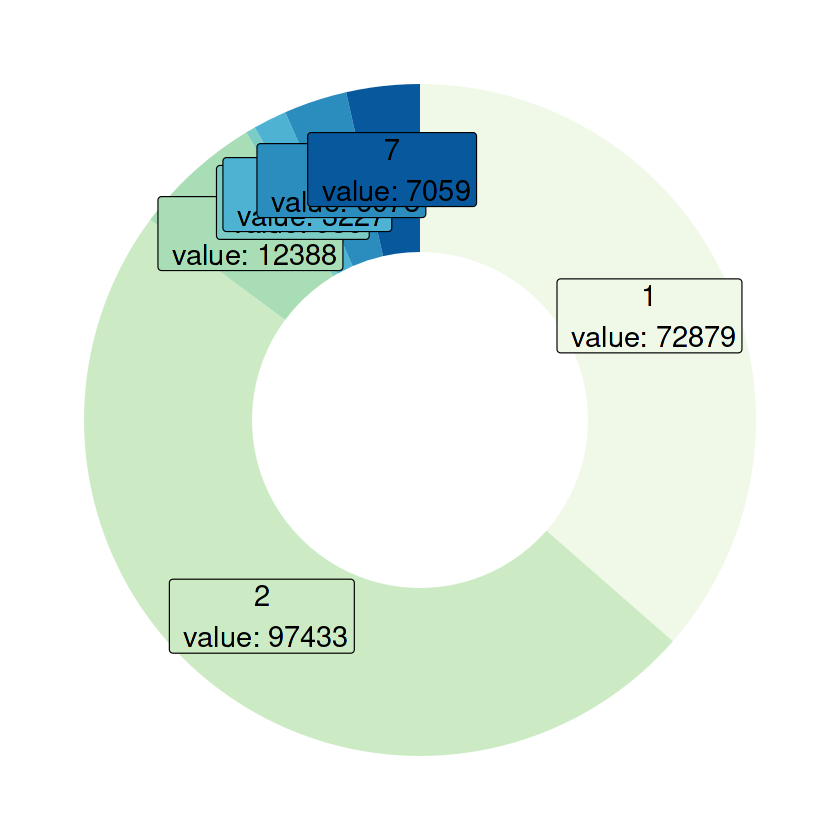

In [23]:
# more fun with R - Gallery
train1$cover_type <- as.character(train1$cover_type)

# Compute count of each level
counts <- table(train1$cover_type)

# Create a data frame with count and class columns
donut_train <- data.frame(
  class = names(counts),
  count = as.numeric(counts)
)

# Compute percentages
donut_train$fraction<-donut_train$count/sum(donut_train$count)

# Compute the cumulative percentages (top of each rectangle)
donut_train$ymax<-cumsum(donut_train$fraction)

# Compute the bottom of each rectangle
donut_train$ymin<-c(0, head(donut_train$ymax, n=-1))

# Compute label position
donut_train$labelPosition<-(donut_train$ymax + donut_train$ymin)/2

# Compute a good label
donut_train$label<-paste0(donut_train$class, "\n value: ", donut_train$count)

# Make the plot
ggplot(donut_train, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=class)) +
  geom_rect() +
  geom_label( x=3.5, aes(y=labelPosition, label=label), size=6) +
  scale_fill_brewer(palette=4) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none")

In [24]:
train1$cover_type<-as.factor(train1$cover_type)
# determining class proportions
class_proportions <- prop.table(table(train1$cover_type))

print("Class Proportions:")
print(class_proportions)

[1] "Class Proportions:"

       1        2        3        4        5        6        7 
0.364395 0.487165 0.061940 0.004680 0.016135 0.030390 0.035295 


The class porpotions are not even, with classes 1 and 2 showing dramatically higher propotions. This may impact some of the models

In [ ]:
#determining N/A
sum(is.na(train1))

In [ ]:
#Scaling numeric columns
scaled_columns<-scale(train1[2:9])

# replacing old columns
scaled_train<-cbind(train1[, -(2:9)], scaled_columns)

In [ ]:
# same for test

#Scaling numeric columns
scaled_test_columns<-scale(test1[2:9])

# replacing old columns
scaled_test<-cbind(test1[, -(2:9)], scaled_test_columns)

In [ ]:
# splitting data

set.seed(42)
ind<-sample(1:nrow(scaled_train), size = 0.7*nrow(scaled_train))
train_mod<-scaled_train[ind,]
test_mod<-scaled_train[-ind,]


# Validation
control <- trainControl(method = "cv", number = 5)

In [ ]:
head(train_mod)

In [ ]:
multi_log <- train(cover_type ~ elevation + aspect + slope + horizontal_distance_to_roadways + hillshade_9am + hillshade_noon + hillshade_3pm + horizontal_distance_to_fire_points, data = train_mod, method = "multinom", trControl = control)
summary(multi_log)

In [ ]:
# Resample values
multi_log$resample

# Predictions
log_pred<-predict(multi_log, test_mod)

# actual outcome
actual<-test_mod$cover_type

#F1 Score
log_f1<-F1_Score(actual, log_pred)
print(log_f1)

In [ ]:
lda <- train(cover_type ~ elevation + aspect + slope + horizontal_distance_to_roadways + hillshade_9am + horizontal_distance_to_fire_points, data = train_mod, method = "lda", trControl = control)

lda$resample

lda_pred <- predict(lda, newdata = test_mod)

lda_f1 <- F1_Score(actual, lda_pred)
print(lda_f1)

In [ ]:
qda <- train(cover_type ~ elevation + aspect + slope + hillshade_noon, data = train_mod, method = "qda", trControl = control)

qda$resample

qda_pred <- predict(qda, newdata = test_mod)

qda_f1 <- F1_Score(actual, qda_pred)
print(qda_f1)

In [ ]:
nb<- train(cover_type ~ elevation + aspect + slope + horizontal_distance_to_roadways + hillshade_9am + hillshade_noon + hillshade_3pm, data = train_mod, method = "naive_bayes", trControl = control)

nb$resample

nb_pred <- predict(nb, newdata = test_mod)

nb_f1 <- F1_Score(actual, nb_pred)
print(nb_f1)

In [ ]:
knn <- train(cover_type ~ elevation + aspect + distance_to_hydro, data = train_mod, method = "knn", trControl = control)

knn$resample

# actual outcome
actual<-test_mod$cover_type

knn_pred <- predict(knn, newdata = test_mod)

knn_f1<- F1_Score(actual, knn_pred)
print(knn_f1)

It may be that a non-linear approach, like knn, is best suited for this data frame. This could partially explain why knn did better. Though, I would recommend a further analysis of adding/removing variables with these models. I also think that a further wrangling and preproccessing of the soil type and wilderness area columns could help, as their inclusion in the models was problematic. 

In [ ]:
final<-train(cover_type ~ elevation + aspect + distance_to_hydro, data = train_mod, method = "knn", trControl = control)

final_outcome<-predict(final, newdata = scaled_test)

submission<- data.frame(id = test$id, final_outcome)
submission


write_csv(submission,"submission.csv")